In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
#import ratings data
ratings_df = pd.read_csv("ratings.csv")
ratings_df.head()

,userID,movieID,rating
0,747,1193,5
1,747,661,3
2,747,2804,5
3,747,919,4
4,747,2791,4


In [3]:
# Calculate overall mean rating
overall_mean = np.mean(ratings_df.rating)
overall_mean

3.5751423149905124

In [4]:
#import users data
users_df = pd.read_csv("users.csv")
users_df.head()

,userID,age,gender
0,4,25,M
1,5,56,M
2,6,50,M
3,15,45,M
4,17,25,F


In [5]:
#import movie data
movies_df = pd.read_csv("movies.tsv", sep = '\t')
movies_df.head()

,movieID,name,year,genre1,genre2,genre3
0,1,Toy Story,1995,Animation,Children's,Comedy
1,2,Jumanji,1995,Adventure,Children's,Fantasy
2,3,Grumpier Old Men,1995,Comedy,Romance,NaN
3,4,Waiting to Exhale,1995,Comedy,Drama,NaN
4,5,Father of the Bride Part II,1995,Comedy,NaN,NaN


In [6]:
import os
from surprise import Dataset
from surprise import Reader
# path to dataset file
file_path = os.path.expanduser("ratings.csv")
# read data from file
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

In [7]:
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.52289065, 1.49723557]),
 'test_mae': array([1.22130432, 1.19927603]),
 'fit_time': (0.019313812255859375, 0.02074289321899414),
 'test_time': (0.15171289443969727, 0.11989402770996094)}

In [8]:
from surprise.model_selection import train_test_split
# split data to train and testing
# test dats is 10% of the ratings.
train_data, test_data = train_test_split(data, test_size=.10)

In [29]:
from surprise.prediction_algorithms.matrix_factorization import SVD
algo = SVD(n_factors=100, n_epochs=30, biased=True, lr_all=0.005, reg_all=0.02, verbose=True)

In [30]:
algo.fit(train_data)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


In [31]:
predictions = algo.test(test_data)
predictions

[Prediction(uid='1587', iid='2378', r_ui=3.0, est=2.8694836076904995, details={'was_impossible': False}),
 Prediction(uid='1279', iid='1256', r_ui=4.0, est=4.807449337650719, details={'was_impossible': False}),
 Prediction(uid='6030', iid='3253', r_ui=4.0, est=3.5256756811126673, details={'was_impossible': False}),
 Prediction(uid='4695', iid='3252', r_ui=2.0, est=3.2895553359556238, details={'was_impossible': False}),
 Prediction(uid='3487', iid='585', r_ui=4.0, est=3.5679719479240513, details={'was_impossible': False}),
 Prediction(uid='290', iid='2792', r_ui=5.0, est=3.3767451858961266, details={'was_impossible': False}),
 Prediction(uid='628', iid='2525', r_ui=4.0, est=2.972516381702985, details={'was_impossible': False}),
 Prediction(uid='1760', iid='3098', r_ui=4.0, est=3.1448684419600945, details={'was_impossible': False}),
 Prediction(uid='5449', iid='1916', r_ui=1.0, est=4.428354236488807, details={'was_impossible': False}),
 Prediction(uid='262', iid='351', r_ui=4.0, est=3.48

In [32]:
from surprise import accuracy
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
rmse, mae

RMSE: 0.9229
MAE:  0.7316


(0.9229428645157066, 0.7315832449907516)

In [13]:
# Use the entire dataset to train
full_train_data = data.build_full_trainset()

In [14]:
algo2 = SVD(n_factors=100, n_epochs=30, biased=True, lr_all=0.005, reg_all=0.02, verbose=True)
algo2.fit(full_train_data)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


In [69]:
rmse = []
for i in range(30):
    algo3 = SVD(n_factors=100, n_epochs=i, biased=True, lr_all=0.005, reg_all=0.02, verbose=True, random_state=101)
    algo3.fit(train_data)
    predictions = algo3.test(test_data)
    rmse.append(accuracy.rmse(predictions))
rmse

RMSE: 1.1223
Processing epoch 0
RMSE: 1.0116
Processing epoch 0
Processing epoch 1
RMSE: 0.9695
Processing epoch 0
Processing epoch 1
Processing epoch 2
RMSE: 0.9509
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
RMSE: 0.9414
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
RMSE: 0.9358
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
RMSE: 0.9322
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
RMSE: 0.9297
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
RMSE: 0.9279
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
RMSE: 0.9266
Processing epoc

Processing epoch 26
Processing epoch 27
RMSE: 0.9257
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
RMSE: 0.9265


[1.122324095345718,
 1.0116284772323458,
 0.9694891020428329,
 0.9509043791611413,
 0.941386318434065,
 0.9358313365226201,
 0.9322427218949879,
 0.929749248392946,
 0.9279282495576527,
 0.9265529703426155,
 0.9254904362045773,
 0.9246565764190733,
 0.9239963286699908,
 0.9234748191784008,
 0.9230668181518048,
 0.9227553085221408,
 0.922529293709607,
 0.922382284556061,
 0.9223111489725219,
 0.9223075766988488,
 0.9223794942614731,
 0.9225290332906007,
 0.9227565743018723,
 0.9230579518013214,
 0.9234401764564387,
 0.923902411315081,
 0.9244424340251027,
 0.9250565823977478,
 0.9257396545098924,
 0.9264855989730495]

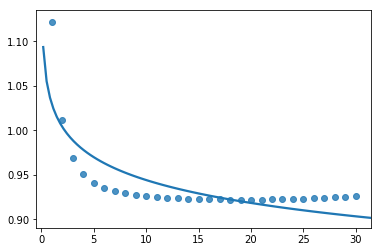

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=list(range(1,31)), y=rmse, logx=True, ci=None)

In [17]:
prediction_matrix = algo2.pu.dot(algo2.qi.T) + np.array(algo2.bu)[np.newaxis].T + algo2.bi + overall_mean
prediction_matrix

array([[4.43581106, 3.31345667, 4.49611902, ..., 3.51902368, 3.50437602,
        3.5627801 ],
       [4.97791936, 3.30942415, 3.84184748, ..., 3.08058436, 3.18240634,
        3.43717918],
       [4.51281426, 3.34658339, 4.3004625 , ..., 3.16155506, 3.56268564,
        3.34370861],
       ...,
       [4.45622632, 3.14752713, 4.05107617, ..., 3.20378314, 3.22324013,
        3.472729  ],
       [4.13009855, 2.90455757, 3.08018799, ..., 1.53168916, 1.80788148,
        1.78942532],
       [4.08751602, 3.38883664, 4.05918392, ..., 3.11802293, 3.33040493,
        3.12218973]])

In [18]:
ratings = ratings_df.pivot(index = 'userID', columns ='movieID', values = 'rating')
prediction_df = pd.DataFrame(prediction_matrix, index = ratings.index, columns = ratings.columns)
prediction_df

movieID,1,2,3,4,5,6,7,8,9,12,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,
4,4.435811,3.313457,4.496119,4.058272,3.976574,3.831885,4.304056,4.170579,3.926448,4.037526,...,3.401676,3.610498,3.603418,3.461225,3.716396,3.596360,3.476668,3.519024,3.504376,3.562780
5,4.977919,3.309424,3.841847,4.473165,3.731375,4.170893,4.479917,4.047701,4.130988,4.248172,...,3.382799,3.609991,3.548670,3.547113,3.840437,3.473482,3.315783,3.080584,3.182406,3.437179
6,4.512814,3.346583,4.300463,3.922402,4.241779,3.348333,4.433064,3.486188,3.498059,3.344159,...,3.541535,3.688492,3.596225,3.523237,3.652796,3.410706,3.159005,3.161555,3.562686,3.343709
15,4.734533,3.409948,3.715624,4.321520,4.208976,3.755667,4.506956,3.591083,4.016501,3.311661,...,3.485831,3.667814,3.414721,3.538729,3.504388,3.582741,3.104761,3.231839,3.361571,3.304444
17,3.550117,2.770035,3.446238,3.346244,2.946489,2.990042,3.277555,2.503741,2.907227,2.784607,...,2.330654,2.734673,2.401168,2.672767,2.447423,2.387845,2.428484,2.280590,2.201009,2.411318
18,4.925673,4.061572,4.833481,4.909268,4.521316,4.168663,4.838661,5.014707,4.261445,4.318599,...,3.973333,3.947122,4.015238,4.082924,4.108993,4.123470,4.053821,3.846494,3.729008,3.803183
19,4.854270,3.814929,4.205628,4.531162,4.160785,3.999427,4.748507,4.333059,4.067544,4.231889,...,3.466114,3.652454,3.748622,3.650159,3.800743,3.858568,3.238113,3.412393,3.534333,3.486376
22,5.084502,3.664462,4.255418,4.391046,4.471297,3.999936,4.856431,4.020928,4.486384,4.326770,...,3.630435,3.723706,3.732710,4.074910,3.915665,3.885173,3.748952,3.579767,3.607666,3.527020
23,4.326425,3.488878,4.354053,4.082132,3.970358,4.089098,4.350242,4.316666,4.052677,3.968198,...,3.407487,3.577899,3.487778,3.668862,3.637771,3.546669,3.500563,3.405838,3.399378,3.657025


In [24]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    predicted_ratings_by_user = predictions.loc[userID, :]
    original_ratings_by_user = original_ratings[original_ratings.userID == userID].merge(movies, how='left', on='movieID').sort_values('rating', ascending=False)
    movies_unrated_by_user = movies[~movies['movieID'].isin(predicted_ratings_by_user)]
    recommendations_by_user = movies_unrated_by_user.merge(predicted_ratings_by_user.to_frame(name='predicted_rating'), how='left', on='movieID').sort_values('predicted_rating', ascending=False)
    
    return original_ratings_by_user, recommendations_by_user.head(num_recommendations)

In [26]:
rated_movies_by_user, recommended_movies_by_user = recommend_movies(prediction_df, 4, movies_df, ratings_df, 20)

In [27]:
rated_movies_by_user

,userID,movieID,rating,name,year,genre1,genre2,genre3
0,4,2245,4,Working Girl,1988,Comedy,Drama,NaN
3,4,2431,4,Patch Adams,1998,Comedy,Drama,NaN
4,4,3252,4,Scent of a Woman,1992,Drama,NaN,NaN
8,4,3156,4,Bicentennial Man,1999,Comedy,Drama,Sci-Fi
10,4,145,4,Bad Boys,1995,Action,NaN,NaN
12,4,2949,4,Dr. No,1962,Action,NaN,NaN
7,4,2313,3,"Elephant Man, The",1980,Drama,NaN,NaN
9,4,1727,3,"Horse Whisperer, The",1998,Drama,NaN,NaN
11,4,376,3,"River Wild, The",1994,Action,Thriller,NaN
13,4,86,3,White Squall,1996,Adventure,Drama,NaN


In [28]:
recommended_movies_by_user

,movieID,name,year,genre1,genre2,genre3,predicted_rating
852,2280,Clay Pigeons,1998,Crime,NaN,NaN,4.654043
15,39,Clueless,1995,Comedy,Romance,NaN,4.582919
16,43,Restoration,1995,Drama,NaN,NaN,4.577341
920,2441,"Hi-Lo Country, The",1998,Drama,Western,NaN,4.546416
35,141,"Birdcage, The",1996,Comedy,NaN,NaN,4.501977
975,2571,"Matrix, The",1999,Action,Sci-Fi,Thriller,4.482467
117,380,True Lies,1994,Action,Adventure,Comedy,4.462891
347,1090,Platoon,1986,Drama,War,NaN,4.447780
541,1465,Rosewood,1997,Drama,NaN,NaN,4.445184
522,1432,Metro,1997,Action,NaN,NaN,4.427396


In [33]:
users_df[users_df.userID == 4]

,userID,age,gender
0,4,25,M
